In [32]:
import pandas as pd
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load the Dataset**

In [34]:
data = pd.read_csv('/content/predictive_maintenance.csv')

In [35]:
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

**Exploratory data analysis (EDA)**

In [36]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [38]:
data.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

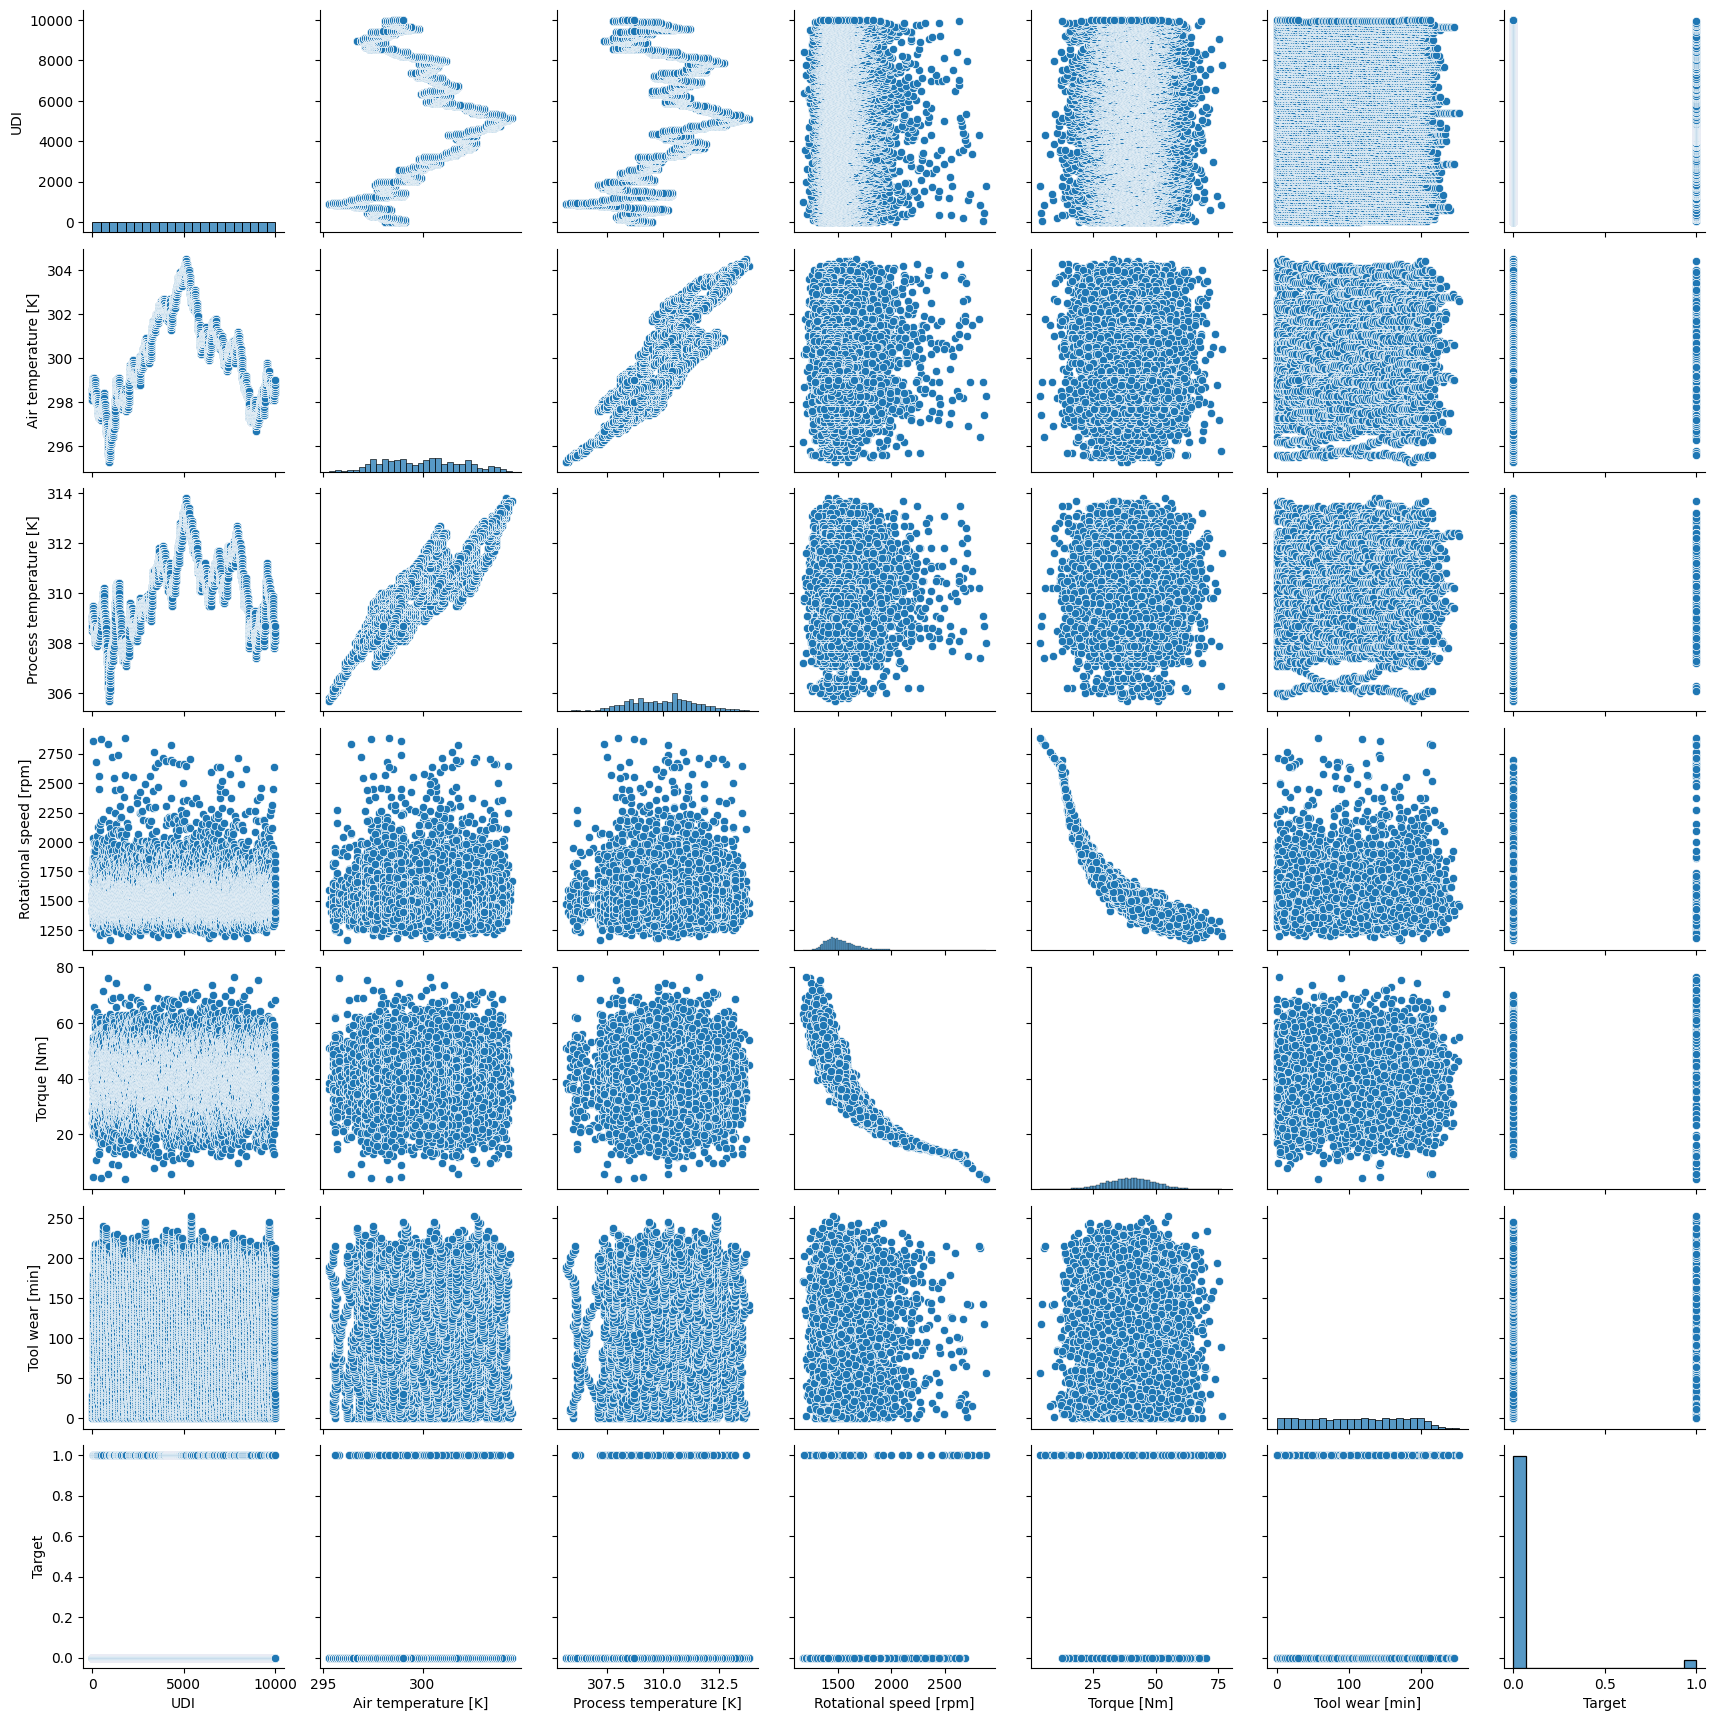

In [39]:
sns.pairplot(data)

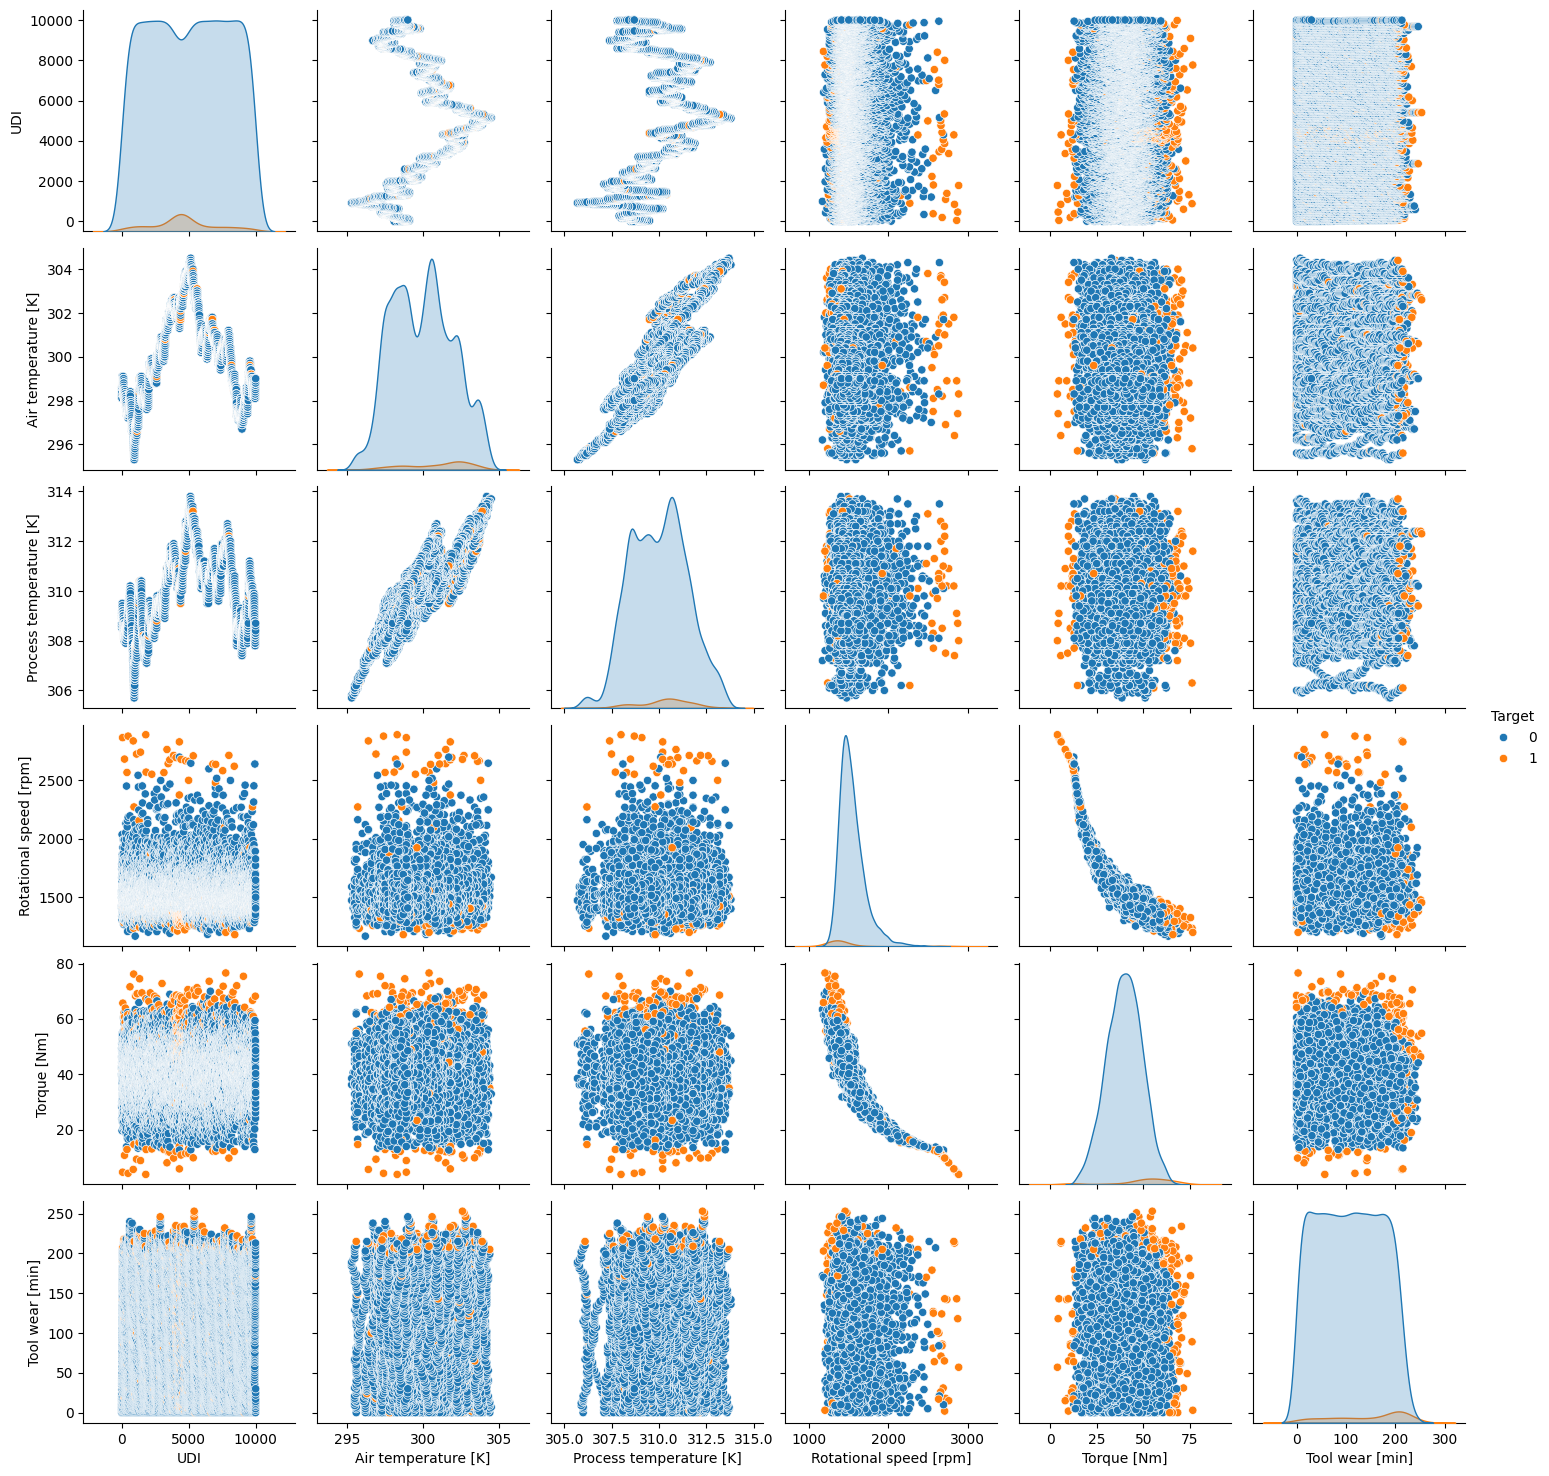

In [63]:
sns.pairplot(data, hue='Target')

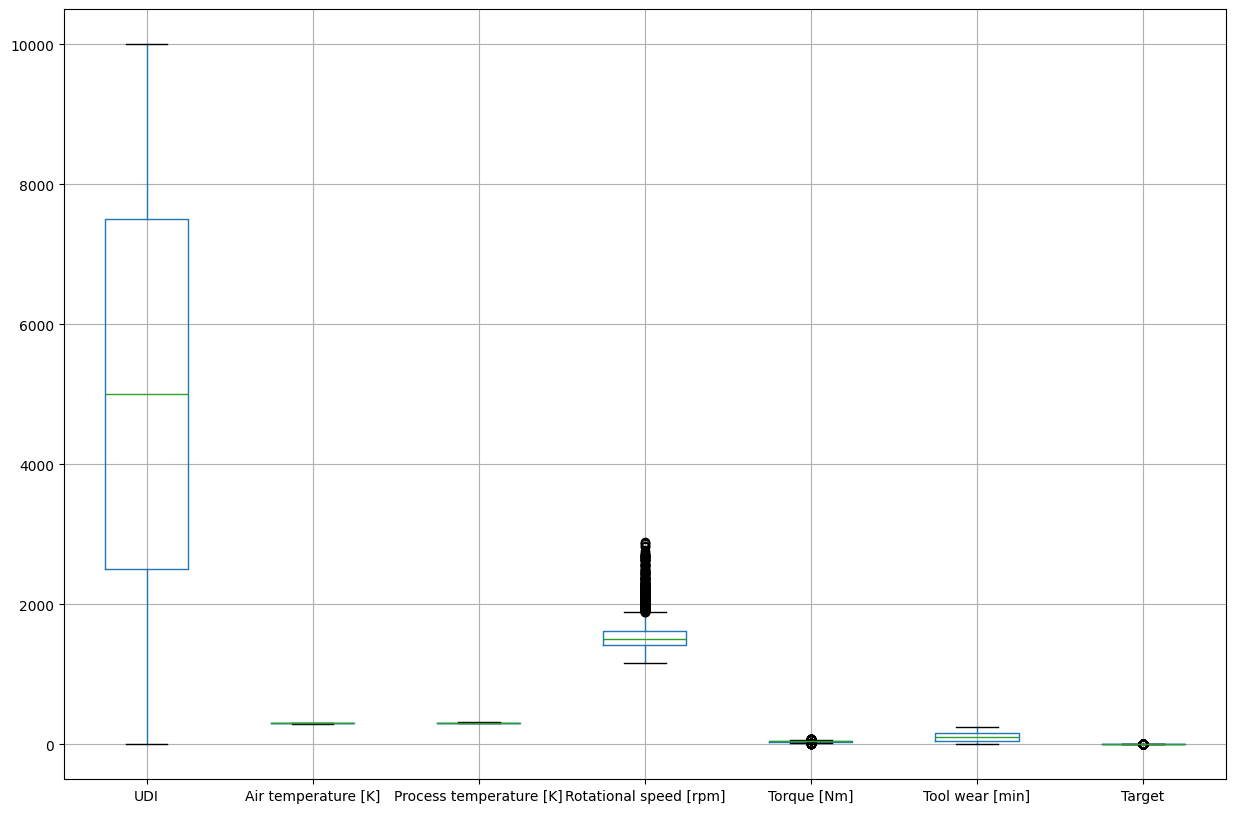

In [40]:
data.boxplot(figsize=(15,10))
plt.show()

In [41]:
data['Failure Type']

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 10000, dtype: object

In [42]:
data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [43]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

<ipython-input-44-524a85ec69d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Failure Type', data= data, palette='bright')


<Axes: xlabel='Failure Type', ylabel='count'>

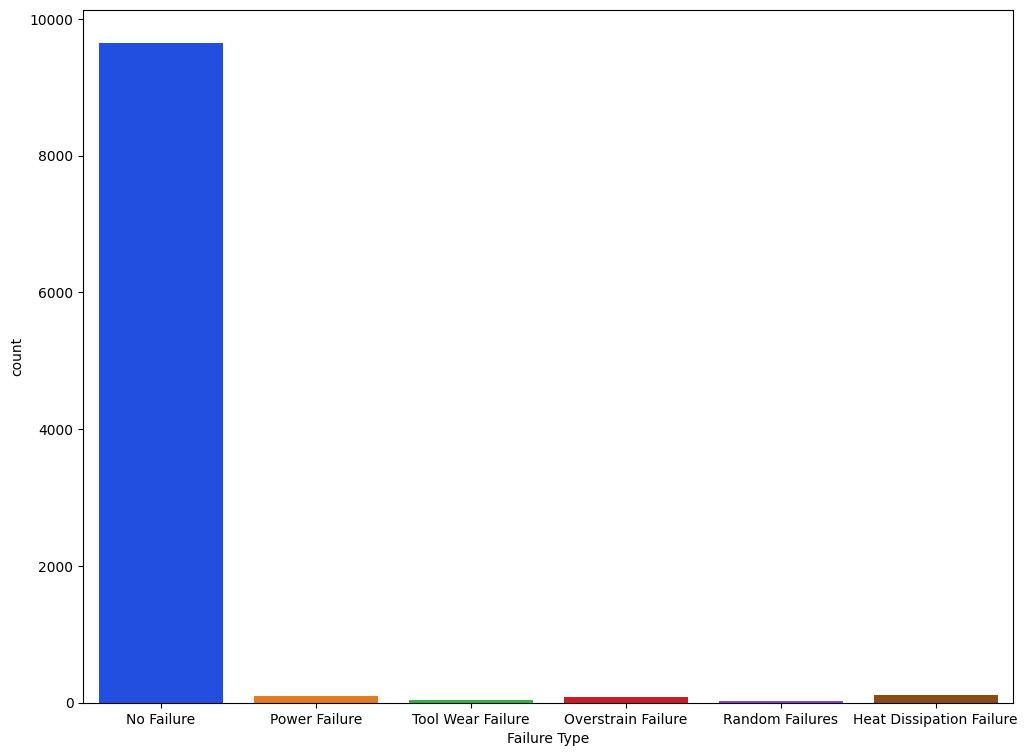

In [44]:
plt.figure(figsize=(12, 9))
sns.countplot(x='Failure Type', data= data, palette='bright')

In [45]:
data['Target']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [46]:
data['Target'].unique()

array([0, 1])

In [47]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

<ipython-input-48-0763f73c0c4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='bright')


<Axes: xlabel='Target', ylabel='count'>

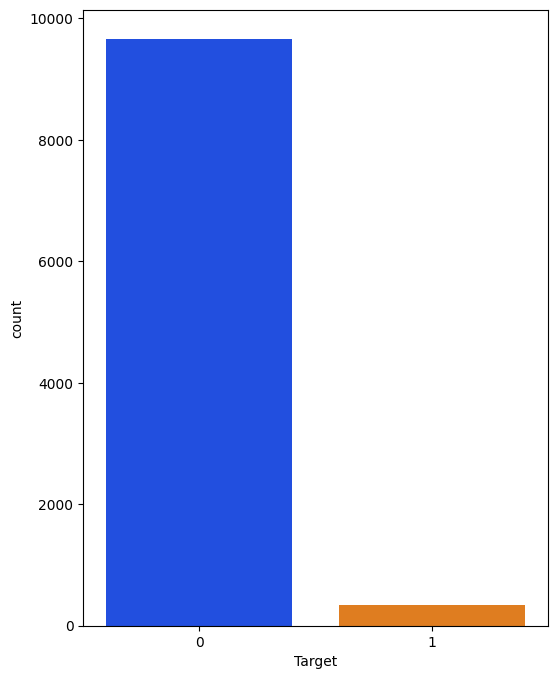

In [48]:
plt.figure(figsize=(6, 8))
sns.countplot(x='Target', data=data, palette='bright')

In [49]:
data['Tool wear [min]']

0        0
1        3
2        5
3        7
4        9
        ..
9995    14
9996    17
9997    22
9998    25
9999    30
Name: Tool wear [min], Length: 10000, dtype: int64

<Axes: >

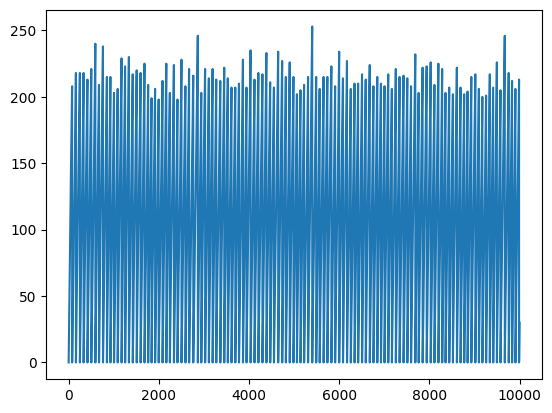

In [50]:
data['Tool wear [min]'].plot()

<Axes: xlabel='Target', ylabel='Tool wear [min]'>

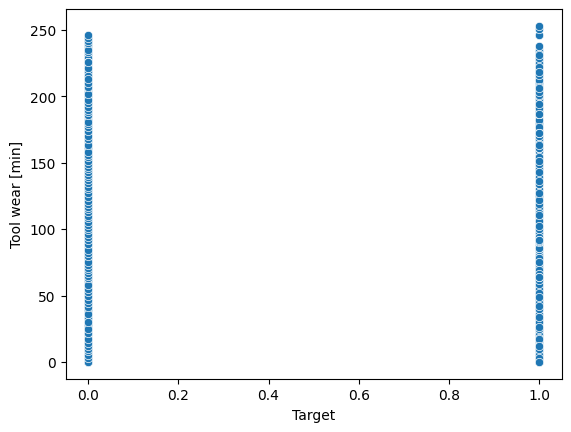

In [51]:
sns.scatterplot(x='Target', y='Tool wear [min]', data=data)

In [52]:
data['Torque [Nm]']

0       42.8
1       46.3
2       49.4
3       39.5
4       40.0
        ... 
9995    29.5
9996    31.8
9997    33.4
9998    48.5
9999    40.2
Name: Torque [Nm], Length: 10000, dtype: float64

<Axes: >

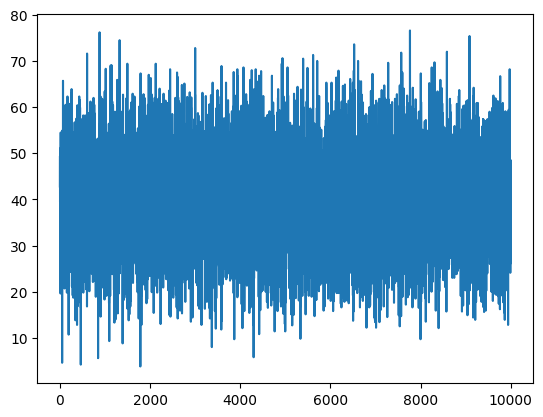

In [53]:
data['Torque [Nm]'].plot()

<Axes: xlabel='Target', ylabel='Torque [Nm]'>

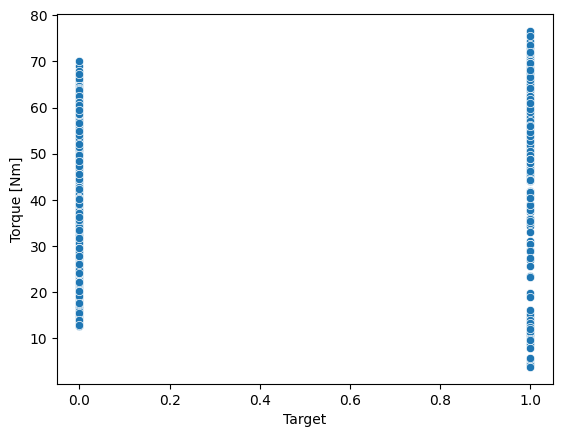

In [54]:
sns.scatterplot(x='Target', y='Torque [Nm]', data=data)

In [55]:
data['Rotational speed [rpm]']

0       1551
1       1408
2       1498
3       1433
4       1408
        ... 
9995    1604
9996    1632
9997    1645
9998    1408
9999    1500
Name: Rotational speed [rpm], Length: 10000, dtype: int64

<Axes: >

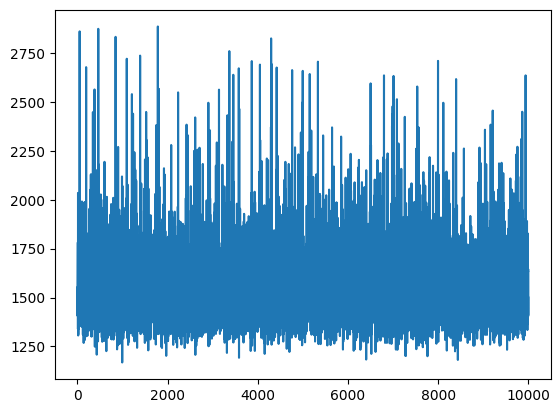

In [56]:
data['Rotational speed [rpm]'].plot()

<Axes: xlabel='Target', ylabel='Rotational speed [rpm]'>

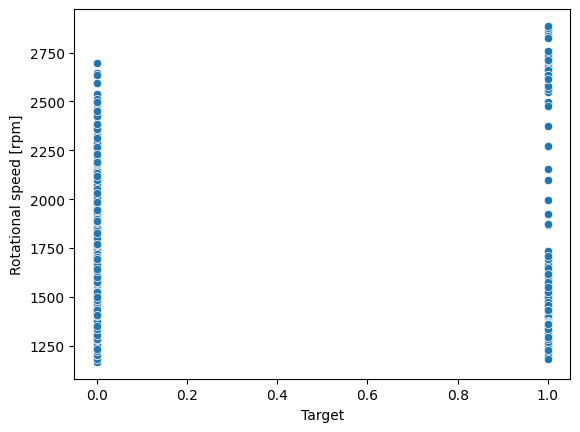

In [57]:
sns.scatterplot(x='Target', y='Rotational speed [rpm]', data=data)

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

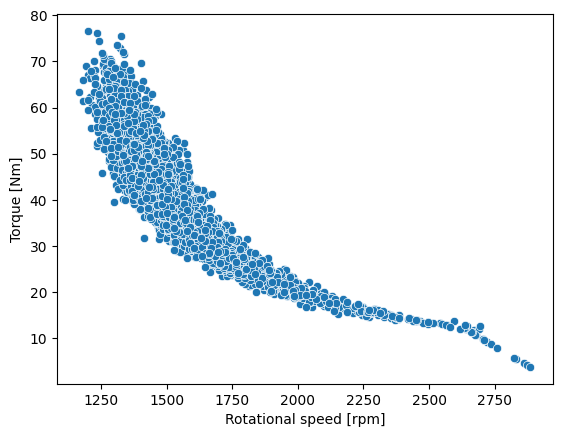

In [58]:
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=data)

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

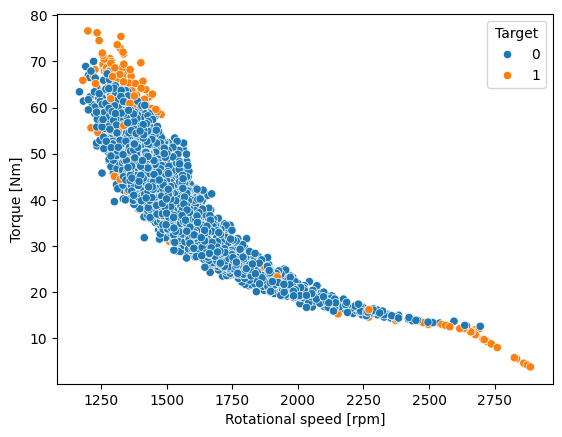

In [62]:
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]',hue='Target', data=data)

In [59]:
data['Process temperature [K]']

0       308.6
1       308.7
2       308.5
3       308.6
4       308.7
        ...  
9995    308.4
9996    308.4
9997    308.6
9998    308.7
9999    308.7
Name: Process temperature [K], Length: 10000, dtype: float64

<Axes: >

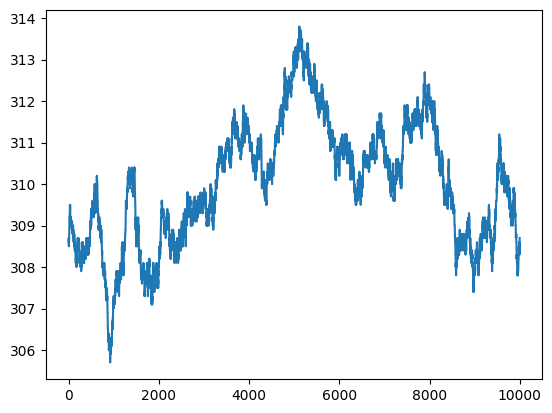

In [60]:
data['Process temperature [K]'].plot()

<Axes: xlabel='Target', ylabel='Process temperature [K]'>

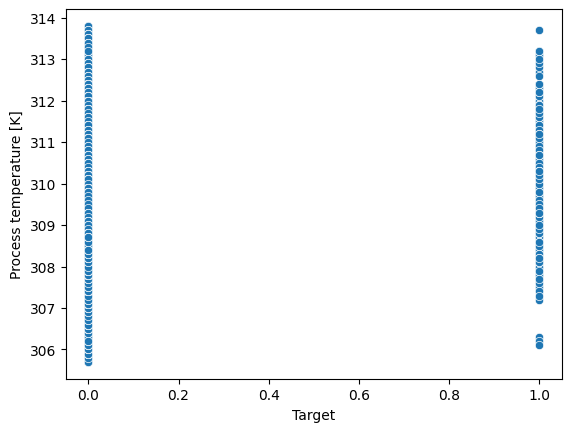

In [61]:
sns.scatterplot(x='Target', y='Process temperature [K]', data=data)

<Figure size 1200x800 with 0 Axes>

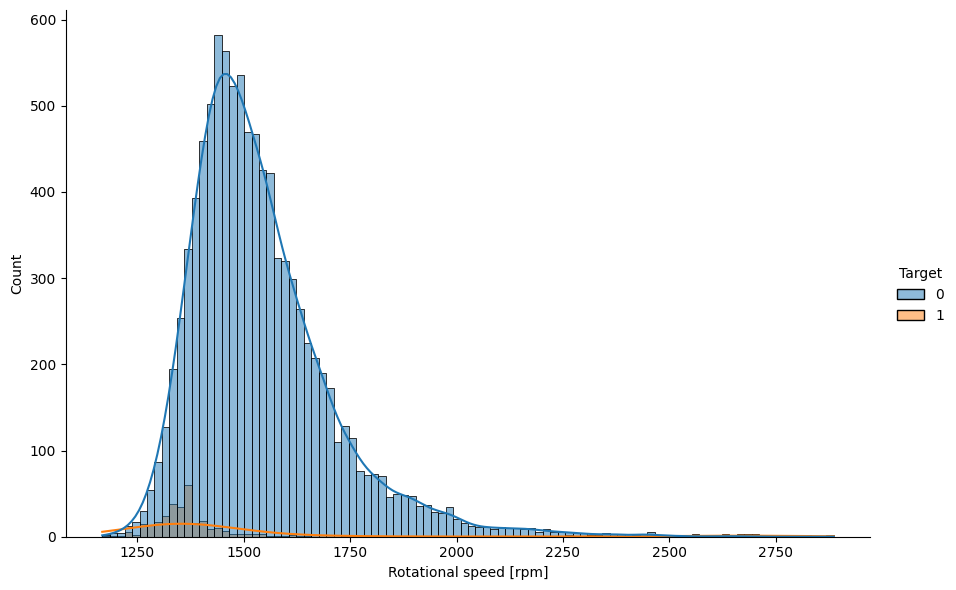

In [71]:
plt.figure(figsize=(12, 8))
sns.displot(x='Rotational speed [rpm]', hue='Target', data=data, kind='hist', height=6, aspect=1.5, kde=True)